In [5]:
import matplotlib.pyplot as plt

In [3]:
import subprocess
import time
def set_env(num_train, num_query, num_base) -> dict[str, str]:
    return {
        "NUM_TRAIN": str(num_train),
        "NUM_QUERY": str(num_query),
        "NUM_BASES": str(num_base),
    }

def experiment(command, env) -> float:
    s = time.perf_counter()
    subprocess.run(command, env=env, stdout=subprocess.DEVNULL)
    return time.perf_counter() - s

In [9]:
import numpy as np
from tqdm.notebook import tqdm
from statistics import mean
num_queries = np.linspace(1, 99, 20, dtype=int)
n = 5
parallel = []
sequential = []

for q in tqdm(num_queries):
    parallel.append(mean(experiment(["./bin/mpar", "+RTS", f"-N6"], set_env(2000, q, 250)) for _ in range(5)))
    sequential.append(mean(experiment("./bin/mseq", set_env(2000, q, 250)) for _ in range(5)))

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up (seq-par)/seq ')

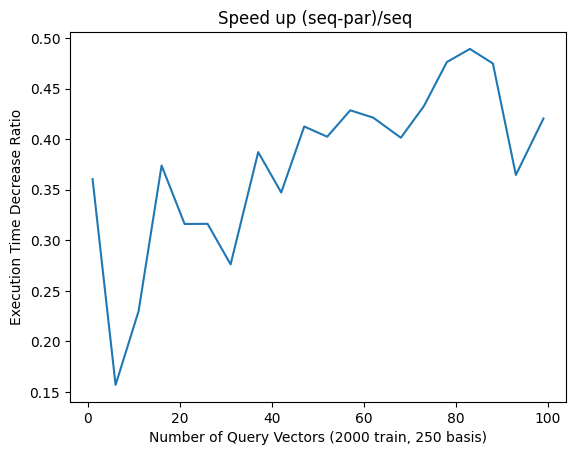

In [7]:
par_araray, seq_array = np.array(parallel), np.array(sequential)
ratio = (seq_array - par_araray) / seq_array
plt.plot(num_queries, ratio)
plt.xlabel("Number of Query Vectors (2000 train, 250 basis)")
plt.ylabel("Execution Time Decrease Ratio")
plt.title("Speed up (seq-par)/seq ")

In [4]:
import numpy as np
from tqdm.notebook import tqdm
from statistics import mean
num_search = np.linspace(300, 5000, 20, dtype=int)
n = 5
parallel = []
sequential = []

for t in tqdm(num_search):
    parallel.append(mean(experiment(["./bin/mpar", "+RTS", f"-N6"], set_env(t, 25, 250)) for _ in range(5)))
    sequential.append(mean(experiment("./bin/mseq", set_env(t, 25, 250)) for _ in range(5)))

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up ((seq-par)/seq, n=5)')

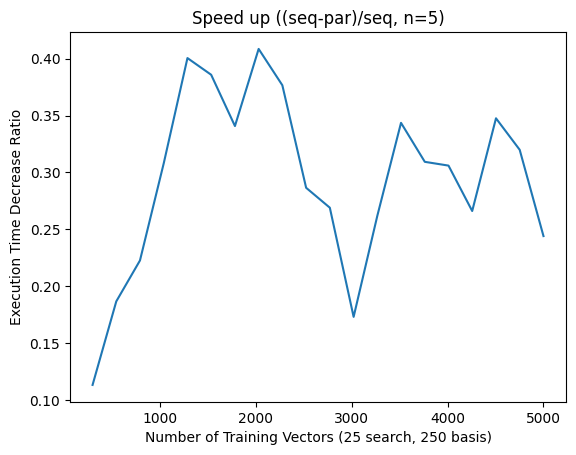

In [6]:
par_araray, seq_array = np.array(parallel), np.array(sequential)
ratio = (seq_array - par_araray) / seq_array
plt.plot(num_search, ratio)
plt.xlabel("Number of Training Vectors (25 search, 250 basis)")
plt.ylabel("Execution Time Decrease Ratio")
plt.title("Speed up ((seq-par)/seq, n=5)")

In [11]:
import numpy as np
from tqdm.notebook import tqdm
from statistics import mean
num_basis = np.linspace(50, 1000, 20, dtype=int)
n = 5
parallel = []
sequential = []

for b in tqdm(num_basis):
    parallel.append(mean(experiment(["./bin/mpar", "+RTS", f"-N6"], set_env(2000, 25, b)) for _ in range(5)))
    sequential.append(mean(experiment("./bin/mseq", set_env(2000, 25, b)) for _ in range(5)))

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up ((seq-par)/seq, n=5)')

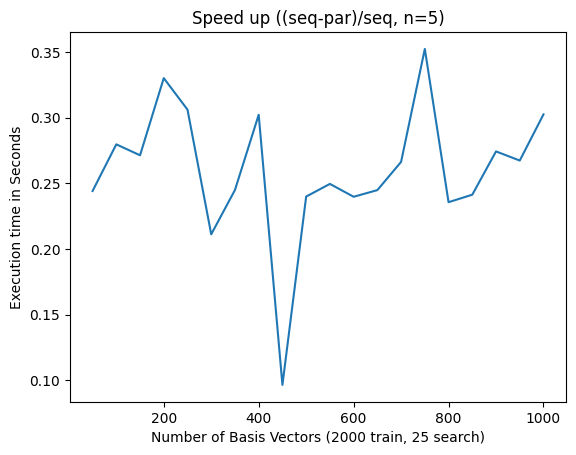

In [12]:
par_araray, seq_array = np.array(parallel), np.array(sequential)
ratio = (seq_array - par_araray) / seq_array
plt.plot(num_basis, ratio)
plt.xlabel("Number of Basis Vectors (2000 train, 25 search)")
plt.ylabel("Execution time in Seconds")
plt.title("Speed up ((seq-par)/seq, n=5)")

In [17]:
from tqdm.notebook import tqdm
from statistics import mean
cores = [2, 4, 6, 8]
n = 5
parallel = []

seq = (mean(experiment(["./bin/mseq"], set_env(2000, 25, 250)) for _ in range(5)))

for c in tqdm(cores):
    parallel.append(mean(experiment(["./bin/mpar", "+RTS", f"-N{c}"], set_env(2000, 25, 250)) for _ in range(5)))


  0%|          | 0/4 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up ((seq-par)/seq, n=5)')

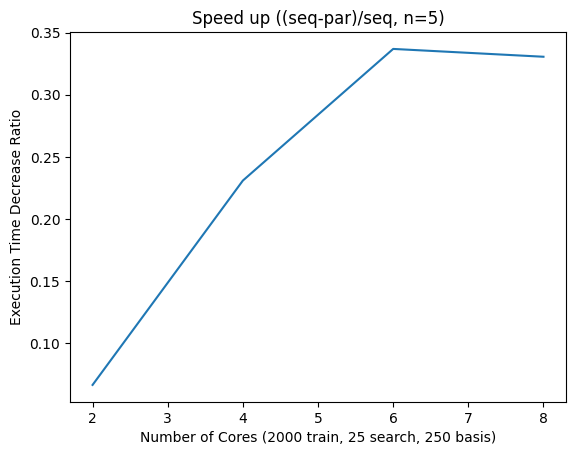

In [19]:
ratio = (seq - np.array(parallel)) / seq
plt.plot(cores, ratio)
plt.xlabel("Number of Cores (2000 train, 25 search, 250 basis)")
plt.ylabel("Execution Time Decrease Ratio")
plt.title("Speed up ((seq-par)/seq, n=5)")

In [ ]:
par_araray, seq_array = np.array(parallel), np.array(sequential)
ratio = (seq_array - par_araray) / seq_array
plt.plot(num_basis, ratio)
plt.xlabel("Number of Basis Vectors (2000 train, 25 search)")
plt.ylabel("Execution time in Seconds")
plt.title("Speed up ((seq-par)/seq, n=5)")